In [4]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment5.ipynb")

# Hierarchical Clustering and Gaussian Mixture Models (GMMs)

Please complete the following assignment. Run all cells and submit your completed notebook through Gradescope.

- Hierarchical clustering is a form of clustering that produces a **set of nested clusters organized in a tree**. It is visualized using a **Dendrogram** (tree-like diagram)

#### In this assignment, the aim is to test your knowledge of Hierarchical clustering and GMMs

$$
\gamma_{ik} = \frac{\pi_k \cdot \mathcal{N}(x_i \mid \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j \cdot \mathcal{N}(x_i \mid \mu_j, \Sigma_j)}
$$


Where:
- $\gamma_{ik}$ is the responsibility of component $k$ for data point $i$.
- $\pi_k$ is the `weight` (or mixing coefficient) for component $k$.
- $\mathcal{N}(x_i \mid \mu_k, \Sigma_k)$ is the Gaussian probability density function for data point $x_i$ given `mean $\mu_k$` and `covariance $\Sigma_k$`.
- $K$ is the total number of components.


<!-- BEGIN QUESTION -->

#### 1. In hierarchical clustering, the dendrogram is used to

    A) Visualize the data distribution
    B) Represent the hierarchy of clusters
    C) Compute the distance between clusters
    D) Perform dimensionality reduction

In [5]:
def ans1():
    'A'
    return ans1()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### 2. Which of the following is **not** an assumption of Gaussian Mixture Models?
    A) Data is generated from a mixture of Gaussian distributions
    B) Clusters are independent
    C) Each cluster has its own mean and covariance
    D) All clusters have equal covariance matrices

In [6]:
def ans2():
    'D'
    return ans1()

<!-- END QUESTION -->

### 3. Implement hierarchical clustering using SciPy on a generated dataset.

##### 3a. Do the following:
- Write a function that takes as input a dataset `X`. Perform a hierarchical clustering according to the following instructions.
- Use the **SciPy Cluster Hierarchical linkage** method to and test the following **linkage** methods: ward, complete, average, and single.
- Use the **Euclidean** distance metric.
- For each linkage method, flatten the hierarchy to $k=2,3,4,5,6,7,8$ clusters and compute the **silhouette score** for each $k$.
- Identify which combination of linkage method and cluster number with the `best silhouette score`.
- Return a tuple consisting of `(linkage_matrix, linkage_method, k, silhouette score)` for the best linkage method.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

def ans3a(X):
    # Define linkage methods to test
    linkage_methods = ['ward', 'complete', 'average', 'single']
    best_score = -1
    best_method = None
    best_k = None
    best_Z = None

    for method in linkage_methods:
        # Make the linkage matrix which can be visaulized as a dendrogram
        z = linkage(X, method=method, metric ='euclidean')

        # Test k values from 2 to 8
        for k in range(2,9):
            labels = fcluster(z,k,criterion='maxclust')
            # Compute the silhouette score
            score = silhouette_score(X, labels)


            # Print debugging information
            # print(f"Method: {method}, k: {k}, Silhouette Score: {score}")
            
            # Update linkage_matrix, linkage_method, k, and silhouette score if the current score is better
            if score > best_score:
                best_score = score
                best_method = method
                best_k = k
                best_Z = z        
    
    # Z = linkage matrix, best method = linkage method, k = # clusters, best_score = silhouette score
    return best_Z, best_method, best_k , best_score


# Test with example data #n_features = 3 makes it 3 dimensional
X, _ = make_blobs(n_samples=30, centers=15, n_features=3, random_state=42)

# Call the function and get the best clustering results
best_Z, best_method, best_k, best_score = ans3a(X)

# Output the results
print(f"linage matrix: {best_Z}")
print(f"Best linkage method: {best_method}")
print(f"Best number of clusters (k): {best_k}")
print(f"Best silhouette score: {best_score}")

# Assuming X is your input data
print("Shape of X:", X.shape)  # Prints the shape of the array

# Print the content of X
print("Content of X:\n", X)



linage matrix: [[13.         14.          0.29538904  2.        ]
 [16.         29.          0.60448688  2.        ]
 [ 7.         23.          0.72824695  2.        ]
 [10.         20.          1.22030236  2.        ]
 [ 4.         21.          1.27618486  2.        ]
 [17.         18.          1.73621891  2.        ]
 [ 8.         12.          1.76395795  2.        ]
 [15.         24.          1.84682152  2.        ]
 [ 2.         27.          2.16353345  2.        ]
 [ 3.          5.          2.18721602  2.        ]
 [ 6.         11.          2.25256383  2.        ]
 [ 0.         26.          2.37956509  2.        ]
 [35.         41.          2.40178847  4.        ]
 [ 9.         19.          2.44180119  2.        ]
 [33.         40.          3.12560475  4.        ]
 [22.         28.          3.22570173  2.        ]
 [ 1.         25.          3.58866914  2.        ]
 [44.         46.          3.94658714  6.        ]
 [37.         47.          4.69223752  8.        ]
 [32.         48

In [8]:
grader.check("q3a")

q3a results: All test cases passed!

<!-- BEGIN QUESTION -->

##### 3b. Write a function that plots the dendrogram for your best cluster and confirm that your choice of cluster number is correct.

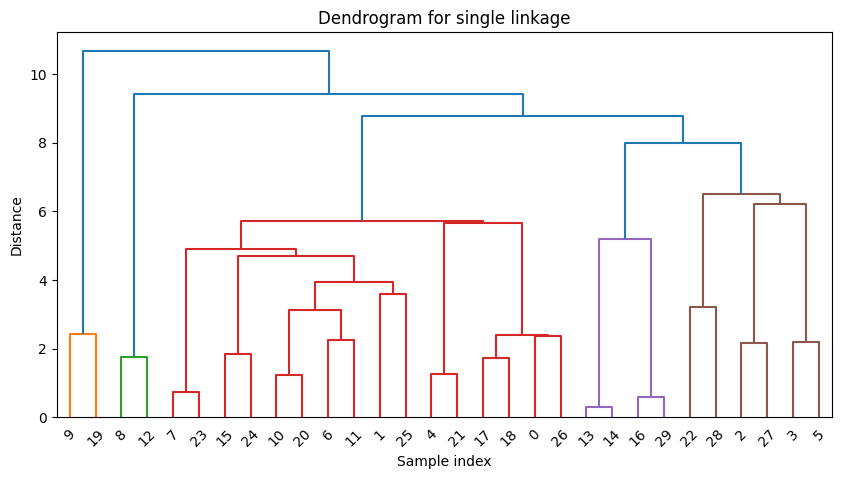

In [9]:
from scipy.cluster.hierarchy import dendrogram
def ans3b(best_Z):
    # Plot the dendrogram for the best linkage method
    plt.figure(figsize=(10, 5))
    plt.title(f"Dendrogram for {best_method} linkage")
    dendrogram(best_Z)
    plt.xlabel("Sample index")
    plt.ylabel("Distance")
    plt.show()

    return plt.show()

dendogram_image = ans3b(best_Z)

<!-- END QUESTION -->

### 4. Given to you is a generated dataset of 4 3D gaussian clusters with two overlapping.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def create_data():
    rng = np.random.default_rng(seed=42)
    cluster_1 = rng.normal(loc=[0, 0, 0], scale=1, size=(100, 3))
    cluster_2 = rng.normal(loc=[5, 5, 5], scale=1, size=(100, 3))
    cluster_3 = rng.normal(loc=[2, 2, 2], scale=1.5, size=(100, 3))
    cluster_4 = rng.normal(loc=[8, 8, 8], scale=1, size=(100, 3))
    X = np.vstack((cluster_1, cluster_2, cluster_3, cluster_4))
    return X

### 4a. Use Gaussian Mixture Models (GMM) to identify clusters. Return the `k_values, bics, and silhouette scores`. Please convert all values to `float`.

#### The Bayesian Information Criterion (BIC) is a statistical measure used to evaluate the goodness of fit of a model while penalizing for complexity.
This is how it works:
1. BIC assesses how well a model fits the data. **A lower BIC value** indicates a better fit.
2. BIC includes a **penalty term** for the number of parameters in the model. (**Discourages overfitting**)
3. **BIC = -2 log(L) + k log(n)**      ; L - Likelihood of the model, k - number of parameters, n - number of data points.



#### NOTE:
- Use `gmm.bic(X)` to find the `bic score` for a given k_value.
- For `silhoutte score` computation, use the `labels of the data points` by performing gmm model prediction.

#### K selection using BIC for GMMs - https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.bic

In [11]:
def evaluate_gmm(X):
    bics = []
    silhouette_scores = []
    k_values = range(2, 10)
    
    for k in k_values:
        gmm = GaussianMixture(n_components=k, random_state=42)
        labels = gmm.fit_predict(X)

        bic = gmm.bic(X)
        bics.append(float(bic))

        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(float(silhouette_avg))

    return k_values, bics, silhouette_scores

print(evaluate_gmm(X))


(range(2, 10), [591.4309996557367, 589.5056437452808, 587.9169567608335, 609.6332897095707, 571.8177633515751, 487.15481727872645, 403.3632970982985, 373.21884323993345], [0.37009211276520537, 0.3599421196726128, 0.391951004558189, 0.3665187623407824, 0.4154286201167711, 0.4616621667984687, 0.5138506820634571, 0.5318386894449681])


In [12]:
grader.check("q4a")

q4a results: All test cases passed!

4b. Determine the optimal k by using the `bic` metric to find the best number of clusters. Return the `best_k_bic`

In [13]:
def optimal_k(X): 
    k_values, bics, silhouette_scores = evaluate_gmm(X)

    # Initialize with a very high BIC value
    best_bic = float('inf')  # Start with a large value for BIC
    best_k_bic = None        # To store the k corresponding to the best (lowest) BIC

    # Iterate over k_values, bics, and silhouette_scores
    for k, bic, silhouette in zip(k_values, bics, silhouette_scores): 
        if bic < best_bic:  # Compare the current bic to the best_bic
            best_bic = bic  # Update best_bic with the new lowest bic
            best_k_bic = k  # Update best_k_bic with the corresponding k



    return best_k_bic



# Call the function and print the result
print(optimal_k(X))

# Print the BIC and Silhouette Score for each k to validate
k_values, bics, silhouette_scores = evaluate_gmm(X)
for k, bic, silhouette in zip(k_values, bics, silhouette_scores): 
    print(f"k={k}, BIC={bic}, Silhouette Score={silhouette}")


9
k=2, BIC=591.4309996557367, Silhouette Score=0.37009211276520537
k=3, BIC=589.5056437452808, Silhouette Score=0.3599421196726128
k=4, BIC=587.9169567608335, Silhouette Score=0.391951004558189
k=5, BIC=609.6332897095707, Silhouette Score=0.3665187623407824
k=6, BIC=571.8177633515751, Silhouette Score=0.4154286201167711
k=7, BIC=487.15481727872645, Silhouette Score=0.4616621667984687
k=8, BIC=403.3632970982985, Silhouette Score=0.5138506820634571
k=9, BIC=373.21884323993345, Silhouette Score=0.5318386894449681


In [14]:
grader.check("q4b")

q4b results: All test cases passed!

<!-- BEGIN QUESTION -->

4c. Visualize clusters with the best k. Plot a 3D plot and color the points based on the `gmm labels`.
Please make sure you `call the function` to display your plot.

Shape of X: (30, 3)
Content of X:
 [[ -0.50427901  -6.24399958  -9.09448459]
 [ -5.99372855  -0.54285889  -0.42526217]
 [ -9.96888006   7.4579518    2.60442303]
 [ -8.53908872   7.3845802   -3.44038465]
 [  6.9454142   -6.79104766  -6.4393044 ]
 [ -8.54493274   7.03661546  -5.59973647]
 [ -1.75973802  -4.23628128   0.81830744]
 [ -4.3403339   -8.70574002   3.68859783]
 [  5.26109853  -9.76604224   8.98781373]
 [  9.19264958   7.29032573   5.22489015]
 [ -0.71919603  -7.81826395  -0.67117101]
 [ -0.31860801  -3.27188471   2.25605823]
 [  3.95428567 -10.21178751   7.89004375]
 [ -0.56408742   7.07538136  -5.83097106]
 [ -0.37715198   6.86170588  -5.74940749]
 [ -7.74453924  -5.6521609   -3.46202146]
 [ -0.02459978   2.52141688  -9.32762193]
 [  1.43502802  -8.22630529  -7.76070086]
 [  0.96408434  -8.4629214   -6.10640918]
 [ 10.38166948   9.29408986   4.49444234]
 [ -1.61844835  -7.21941434  -0.10384195]
 [  7.82856916  -6.65142573  -5.52870524]
 [ -3.77431674  10.10627839   7.41819188]

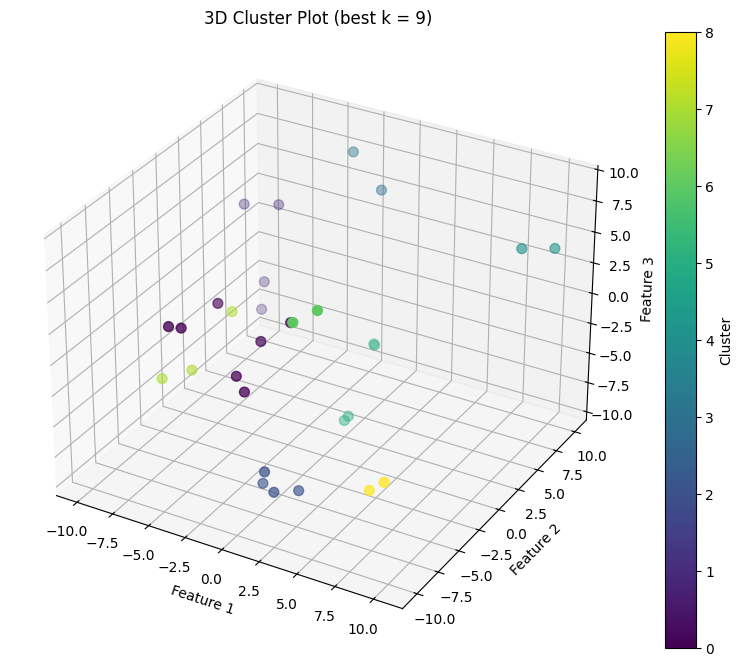

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


# Assuming X is your input data
print("Shape of X:", X.shape)  # Prints the shape of the array

# Print the content of X
print("Content of X:\n", X)

# Check if X has 3 dimensions
if X.ndim == 2 and X.shape[1] == 3:
    print("X has 3 dimensions (3 features).")
else:
    print("X does not have 3 dimensions.")

def plot_clusters(X):
    # Create a figure for the 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Get the optimal number of clusters (best k)
    best_k = optimal_k(X)

    # Fit the GMM with the optimal k
    gmm = GaussianMixture(n_components=best_k, random_state=42)
    labels = gmm.fit_predict(X)

    # Extract the columns for 3D plotting (assuming X has at least 3 dimensions)
    x_1 = X[:, 0]
    x_2 = X[:, 1]
    x_3 = X[:, 2]

    # Create the scatter plot with color based on the cluster labels
    scatter = ax.scatter(x_1, x_2, x_3, c=labels, cmap='viridis', s=50)

    # Add labels and a color bar
    ax.set_title(f'3D Cluster Plot (best k = {best_k})')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    
    # Add a color bar to show which colors correspond to which cluster
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('Cluster')

    # Show the plot
    plt.show()

# Call the function to display the plot
plot_clusters(X)


<!-- END QUESTION -->

### 5. In this question we will implement GMM from scratch. We have filled up most of the code up for you, and require you to fill in the incomplete portions.
#### Imagine you’re running a coffee shop and you have data on your customers’ preferences for coffee.

##### Each customer likes a different blend of beans, which you can represent as a point in two dimensions: 

* sweetness (x-axis)
* acidity (y-axis). 

##### Your goal is to `identify the three most popular blends (clusters)` from a pile of customer reviews that provide noisy measurements of these two characteristics.

- To do this, we will implement `GMM using the EM algorithm` and cluster the data.
1.	Expectation Step (E-step): The model takes a guess about the `likelihood that each customer belongs to each blend`. At this point, it might not be sure, so it assigns probabilities `(soft assignments)` based on how close the customers’ preferences are to the different blends.
2.	Maximization Step (M-step): The model then `updates its guess about the actual parameters` of the coffee blends -- essentially `adjusting the mean, variance, and proportion of customers for each blend`, based on the soft assignments from the previous step.

#### The EM algorithm is like refining a recipe. Each time you taste-test (E-step) and then tweak the ingredients (M-step), the blend becomes more representative of what customers want.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
def create_data_gmm():
    np.random.seed(42)

    # Means and covariances for three Gaussian distributions (coffee blends)
    means = np.array([[2, 3], [8, 7], [5, 10]])  # sweetness and acidity means
    covariances = [np.array([[1, 0.5], [0.5, 1]]),  # covariance matrix for blend 1
                np.array([[1, -0.3], [-0.3, 1]]),  # covariance matrix for blend 2
                np.array([[1, 0], [0, 1]])]  # covariance matrix for blend 3

    # Number of points in each cluster (representing customers)
    points_per_cluster = 100

    # Generate points from each Gaussian distribution
    X1 = np.random.multivariate_normal(means[0], covariances[0], points_per_cluster)
    X2 = np.random.multivariate_normal(means[1], covariances[1], points_per_cluster)
    X3 = np.random.multivariate_normal(means[2], covariances[2], points_per_cluster)

    # Combine all points into one dataset
    X = np.vstack((X1, X2, X3))
    return X

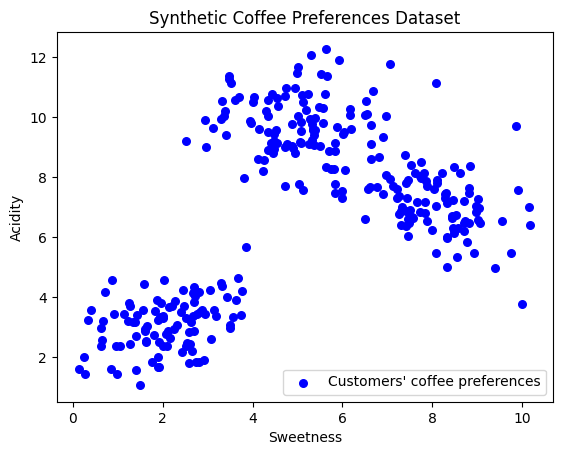

In [17]:
X = create_data_gmm()
plt.scatter(X[:, 0], X[:, 1], s=30, color='b', label="Customers' coffee preferences")
plt.title('Synthetic Coffee Preferences Dataset')
plt.xlabel('Sweetness')
plt.ylabel('Acidity')
plt.legend()
plt.show()

#### For the initialization of the parameters, we can do as shown below:

In [18]:
def initialize_params(X, n_clusters):
    np.random.seed(42)
    n_samples, n_features = X.shape

    #Randomly initialize means from the data
    means = X[np.random.choice(n_samples, n_clusters, False)]
    
    #initialize covariances as identity matrices
    covariances = [np.eye(n_features) for _ in range(n_clusters)]
    
    #initialize equal weights for the mixture components
    weights = np.ones(n_clusters) / n_clusters

    return means, covariances, weights

### 5a) First, complete the code which would help perform the `expectation step` of the EM algorithm. 
- You are required to fill in the correct code that would compute the `responsibility` (posterior probability that a point belongs to a cluster)
- Remember that the `responsibility calculation uses the initialized parameters` (means, covariances, and weights). 
- Use the `multivariate_normal` function to `compute the pdf` of the multivariate Gaussian.
- Return the computed `responsibilities` array. Please don't forget to normalize the responsibilities before returning it.

In [19]:
from scipy.stats import multivariate_normal

def expectation_step(X, means, covariances, weights):
    n_samples, n_clusters = X.shape[0], len(means)
    responsibilities = np.zeros((n_samples, n_clusters))  # Initialize responsibilities array
    
    # Loop over each cluster to compute responsibilities
    for k in range(n_clusters):
        # Compute the Gaussian likelihood for cluster k (pdf of the multivariate normal distribution)
        likelihood = multivariate_normal(mean=means[k], cov=covariances[k]).pdf(X)
        
        # Multiply the likelihood by the weight of the cluster (prior)
        responsibilities[:, k] = weights[k] * likelihood
    
    # Normalize responsibilities so that they sum to 1 for each sample (row-wise normalization)
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)

    return responsibilities


In [20]:
grader.check("q5a")

q5a results: All test cases passed!

### 5b) Secondly, complete the code which would help perform the `maximization step` of the EM algorithm. 
- In the below code, you are required to complete the code for `computing the covariances`.
- As a refresher, the update formulas are given below.

**Mean Update**

$$
\mu_k = \frac{\sum_{i=1}^{N} \gamma_{ik} x_i}{\sum_{i=1}^{N} \gamma_{ik}}
$$


**Covariance Update**

$$
\Sigma_k = \frac{\sum_{i=1}^{N} \gamma_{ik} (x_i - \mu_k)(x_i - \mu_k)^T}{\sum_{i=1}^{N} \gamma_{ik}}
$$


**Weights Update**

$$
\pi_k = \frac{\sum_{i=1}^{N} \gamma_{ik}}{N}
$$


Where:
- $\gamma_{ik}$ is the responsibility of component $k$ for data point $i$.
- $N$ is the total number of data points.
- $x_i$ is the data point.

In [21]:
def maximization_step(X, responsibilities):
    n_samples, n_clusters = responsibilities.shape
    n_features = X.shape[1]
    
    #initialize parameters
    means = np.zeros((n_clusters, n_features))
    covariances = []
    weights = np.zeros(n_clusters)
    
    for k in range(n_clusters):
        # effective number of points assigned to cluster k
        Nk = responsibilities[:, k].sum()
        
        #update the means
        means[k] = (X * responsibilities[:, k][:, np.newaxis]).sum(axis=0) / Nk
        #update the covariance matrices
        covariance_k = np.zeros((n_features, n_features)) 

         
        for i in range(n_samples):
            # Calculate the difference between the data point and the mean for cluster k
            diff = X[i] - means[k]
            # Outer product of the difference, scaled by the responsibility
            covariance_k += responsibilities[i, k] * np.outer(diff, diff)

        covariances.append(covariance_k / Nk)  # Normalize by Nk
        
        #update the weights (mixture proportions)
        weights[k] = Nk / n_samples
    
    return means, covariances, weights

In [22]:
grader.check("q5b")

q5b results: All test cases passed!

### 5c) Complete the code which would help compute the `log-likelihood` of the multivariate normal distribution using the `3 calculated parameters` (mean, covariance, and weights) from the EM steps.

**Log-Likelihood Calculation:**

$$
\log L(\theta) = \sum_{i=1}^{N} \log \left( \sum_{k=1}^{K} \pi_k \cdot \mathcal{N}(x_i \mid \mu_k, \Sigma_k) \right)
$$


Where:
- $\log L(\theta)$ is the log-likelihood of the parameters $\theta$.
- $N$ is the total number of data points.
- $K$ is the number of components.
- $\pi_k$ is the mixing coefficient for component $k$.
- $\mathcal{N}(x_i \mid \mu_k, \Sigma_k)$ is the Gaussian probability density function for data point $x_i$ given mean $\mu_k$ and covariance $\Sigma_k$.

In [23]:
def log_likelihood(X, means, covariances, weights):
    n_samples, n_clusters = X.shape[0], len(means)
    log_likelihood = 0
    
    for i in range(n_samples):
        # Calculate the likelihood for each cluster for the i-th sample
        likelihoods = np.zeros(n_clusters)
        
        for k in range(n_clusters):
            # Compute the multivariate normal probability density function (pdf)
            likelihoods[k] = weights[k] * multivariate_normal.pdf(X[i], mean=means[k], cov=covariances[k])
        
        # Sum the weighted likelihoods for the current sample
        log_likelihood += np.log(np.sum(likelihoods))
    
    return log_likelihood


In [24]:
grader.check("q5c")

q5c results: All test cases passed!

### 5d) Write a function `em_algorithm` which would:
1. `Initialize` the parameters
2. Iteratively perform the `expectation step`
3. Perform the `maximization step`
4. Compute the`Log-likelihood` of the multivariate Gaussian
5. Check for `convergence `
6. Return `means, covariances, weights, responsibilities, log_likelihoods`

- You can do this by calling the appropriate functions that you completed from 5a) through 5c) until step 4.
- For step 5, check if the last and penultimate log likelihoods have a difference below a threshold value `tol` and break if that condition is satisfied.

In [25]:
def em_algorithm(X, n_iters=100, tol=1e-4):
    log_likelihoods = []  # Use this list to store all the log-likelihood values
    n_clusters = 3

    # Step 1: Initialize parameters
    means, covariances, weights = initialize_params(X, n_clusters)

    for _ in range(n_iters):
        # Step 2: Expectation Step
        responsibilities = expectation_step(X, means, covariances, weights)

        # Step 3: Maximization Step
        means, covariances, weights = maximization_step(X, responsibilities)

        # Step 4: Compute log-likelihood
        compute_log_likelihood = log_likelihood(X, means, covariances, weights)
        log_likelihoods.append(compute_log_likelihood)

        # Step 5: Check for convergence
        if len(log_likelihoods) > 1 and abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            break

    return means, covariances, weights, responsibilities, log_likelihoods


In [26]:
grader.check("q5d")

q5d results: All test cases passed!

<!-- BEGIN QUESTION -->

### 5e) Run the below code to visualize your GMM clusters means.

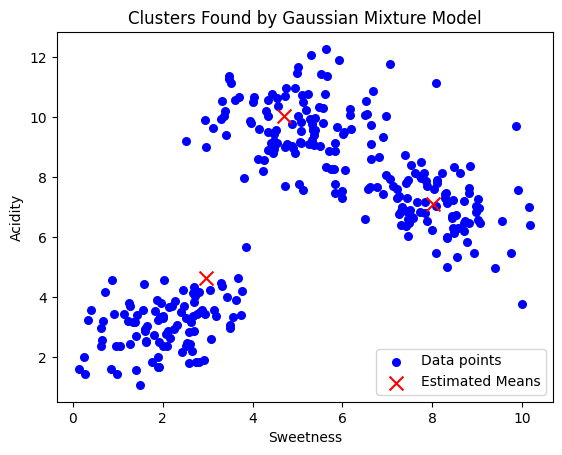

In [27]:
n_clusters = 3
means, covariances, weights, responsibilities, log_likelihoods = em_algorithm(X, n_clusters)

plt.scatter(X[:, 0], X[:, 1], s=30, color='b', label="Data points")
plt.scatter(means[:, 0], means[:, 1], s=100, color='r', label="Estimated Means", marker='x')
plt.title('Clusters Found by Gaussian Mixture Model')
plt.xlabel('Sweetness')
plt.ylabel('Acidity')
plt.legend()
plt.show()

<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. 
Please submit the completed notebook on Gradescope to view your results!